## How to call immune subtypes on new data ##

Let's suppose you have some:
  a.) RPKM (or FPKM or something equivlent) gene expression data 
  b.) Has hg19 gene symbols mapped to it.
  c.) knowledge on how to batch correct / normalize it with regard to TCGA PanCancer data*
  
and you'd like to call some immune subtypes on those samples.

In [1]:

library(ggplot2)
options(repr.plot.width=4, repr.plot.height=3)

In [19]:
#loading TCGA PanCancer EB++ expression data, subset to the pertinent genes.

tcgaSubset <- read.table('../shiny-app/Immune-Subtype-Clustering/data/ebppSubset.tsv.bz2', header = T, sep = '\t', stringsAsFactors = F)
dim(tcgaSubset)
tcgaSubset[1:4,1:5]

[1] 2316 9129

,TCGA.OR.A5J1.01A.11R.A29S.07,TCGA.OR.A5J2.01A.11R.A29S.07,TCGA.OR.A5J3.01A.11R.A29S.07,TCGA.OR.A5J5.01A.11R.A29S.07,TCGA.OR.A5J6.01A.31R.A29S.07
A1CF,0.0000,0.000,0.5925,1.5492,0.000
ABCA1,319.4040,1071.800,896.4600,310.6120,800.283
ABCA8,4.3228,121.997,1368.6900,982.1840,5000.650
ABCB11,0.4803,0.000,1.7775,0.0000,0.000


In [3]:
# need to subset before transforms
reportedScores <- read.table('../shiny-app/Immune-Subtype-Clustering//data//five_signature_mclust_ensemble_results.tsv.gz', sep='\t', header=T, stringsAsFactors = F)
head(reportedScores)
rownames(reportedScores) <- reportedScores$AliquotBarcode

AliquotBarcode,SampleBarcode,ClusterModel1,ClusterModel2,LIexpression_score,CSF1_response,TGFB_score_21050467,Module3_IFN_score,CHANG_CORE_SERUM_RESPONSE_UP
TCGA.02.0047.01A.01R.1849.01,TCGA-02-0047-01A,4,4,-1.3536972,0.8995777,0.09838865,-0.43775189,-0.5989618
TCGA.02.0055.01A.01R.1849.01,TCGA-02-0055-01A,4,4,-0.5016848,1.4674281,1.41870736,0.03473346,0.6990816
TCGA.02.2483.01A.01R.1849.01,TCGA-02-2483-01A,4,4,-0.9197809,0.4884155,-0.50393689,-0.68551726,1.0855086
TCGA.02.2485.01A.01R.1849.01,TCGA-02-2485-01A,4,4,-0.7810493,0.1039455,-0.65700848,1.49949319,0.4496605
TCGA.02.2486.01A.01R.1849.01,TCGA-02-2486-01A,4,4,-0.0361280,1.8245642,-0.27930992,2.53785832,0.1475449
TCGA.04.1348.01A.01R.1565.13,TCGA-04-1348-01A,2,2,0.6439911,0.7957605,-0.63769666,0.90119552,1.8003985


In [4]:
tcgaSubset <- log2(tcgaSubset + 1)

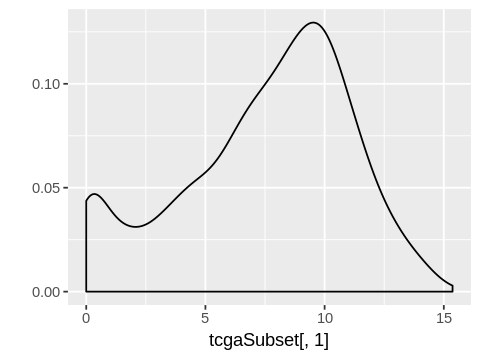

In [5]:
qplot(tcgaSubset[,1], geom='density')

In [42]:
# bring in the new data #
# found some RPKM RNA-seq data
# 
load('../ExtraData/newDat.rda')
dim(newDat)
newDat[1:5,1:5]

[1] 20130     6

,rpkm.exp_005_shNTC_rep1,rpkm.exp_005_shNTC_rep2,rpkm.exp_005_shNTC_rep3,rpkm.exp_005_shTRPS1_seq1,rpkm.exp_005_shTRPS1_seq2
TSPAN6,4.866946,5.59851858,6.0323073,8.81300835,7.31116077
DPM1,14.703788,14.54414233,15.2178512,13.48725417,14.18521178
SCYL3,2.613824,2.62848323,2.6941885,2.33930243,2.61831372
C1orf112,2.130704,1.95809753,1.9696715,1.48692841,1.51562986
FGR,0.000000,0.02082027,0.0149617,0.01707083,0.01057218


In [44]:
didx <- !duplicated(as.character(rownames(newDat)))
dat <- newDat[didx,]
dim(dat)
dat[1:5,1:5]

[1] 20130     6

,rpkm.exp_005_shNTC_rep1,rpkm.exp_005_shNTC_rep2,rpkm.exp_005_shNTC_rep3,rpkm.exp_005_shTRPS1_seq1,rpkm.exp_005_shTRPS1_seq2
TSPAN6,4.866946,5.59851858,6.0323073,8.81300835,7.31116077
DPM1,14.703788,14.54414233,15.2178512,13.48725417,14.18521178
SCYL3,2.613824,2.62848323,2.6941885,2.33930243,2.61831372
C1orf112,2.130704,1.95809753,1.9696715,1.48692841,1.51562986
FGR,0.000000,0.02082027,0.0149617,0.01707083,0.01057218


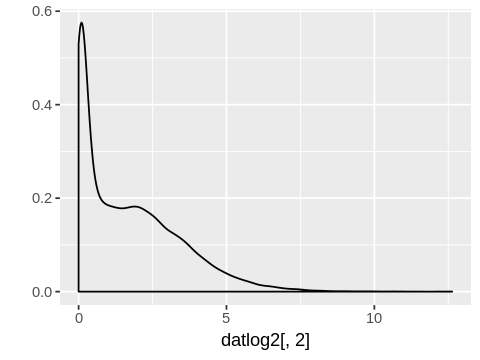

In [45]:
datlog2 <- log2(dat+1)
qplot(datlog2[,2], geom='density')

In [46]:
ls()

[1] "dat"               "datlog2"           "didx"             
 [4] "newDat"            "newDatSub"         "newDatSubMeds"    
 [7] "reportedScores"    "sharedGenes"       "tcgaSubset"       
[10] "tcgaSubsetSub"     "tcgaSubsetSubMeds"

In [47]:
datlog2[1:5,1:5]


,rpkm.exp_005_shNTC_rep1,rpkm.exp_005_shNTC_rep2,rpkm.exp_005_shNTC_rep3,rpkm.exp_005_shTRPS1_seq1,rpkm.exp_005_shTRPS1_seq2
TSPAN6,2.552610,2.72214216,2.81399811,3.29469549,3.05504998
DPM1,3.973041,3.95829911,4.01951077,3.85671228,3.92459512
SCYL3,1.853526,1.85936660,1.88525748,1.73954676,1.85531750
C1orf112,1.646487,1.56466962,1.57030337,1.31436498,1.33091967
FGR,0.000000,0.02972888,0.02142528,0.02442015,0.01517237


In [48]:
# clean up
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,823880,44.0,28397493,1516.6,135409805,7231.7
Vcells,56650346,432.3,170553963,1301.3,561299081,4282.4


In [49]:
### joining data sets ###
sharedGenes  <- intersect(rownames(tcgaSubset), rownames(dat))

# first median scale each data set
newDatSub    <- datlog2[sharedGenes,]
newDatSubMeds<- apply(newDatSub, 1, median, na.rm=T)  
newDatSub    <- sweep(newDatSub,1,newDatSubMeds,'-')


In [50]:
ls()
gc()

[1] "dat"               "datlog2"           "didx"             
 [4] "newDat"            "newDatSub"         "newDatSubMeds"    
 [7] "reportedScores"    "sharedGenes"       "tcgaSubset"       
[10] "tcgaSubsetSub"     "tcgaSubsetSubMeds"

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,823691,44.0,22717994,1213.3,135409805,7231.7
Vcells,56670029,432.4,170553963,1301.3,561299081,4282.4


In [51]:
dim(dat)
dim(newDatSub)
length(sharedGenes)

[1] 20130     6

[1] 2227    6

[1] 2227

In [52]:
dim(tcgaSubset)

[1] 2316 9129

In [53]:
tcgaSubsetSub <- tcgaSubset[sharedGenes,]

rm(tcgaSubset)
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,814515,43.5,18174395,970.7,135409805,7231.7
Vcells,55839243,426.1,170553963,1301.3,561299081,4282.4


In [54]:
tcgaSubsetSubMeds <- apply(tcgaSubsetSub, 1, median, na.rm=T)
head(tcgaSubsetSubMeds)

A1CF     ABCA1     ABCA8    ABCB11     ABCB1     ABCC3 
  0.00000 936.04000  55.97298   0.41780  92.58380 756.14400

In [55]:
tcgaSubsetSub <- sweep(tcgaSubsetSub,1,tcgaSubsetSubMeds,'-')  

In [58]:
gc()
ls()
rm(dat, datlog2, didx, newDat)
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,814910,43.6,7444231,397.6,135409805,7231.7
Vcells,55842440,426.1,163795804,1249.7,561299081,4282.4


[1] "dat"               "datlog2"           "didx"             
 [4] "newDat"            "newDatSub"         "newDatSubMeds"    
 [7] "reportedScores"    "sharedGenes"       "tcgaSubsetSub"    
[10] "tcgaSubsetSubMeds"

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,796990,42.6,5955384,318.1,135409805,7231.7
Vcells,55409418,422.8,163795804,1249.7,561299081,4282.4


In [60]:
library(pryr)
mem_used()

489 MB

In [62]:

  # then join them at the genes
joinDat      <- cbind(newDatSub, tcgaSubsetSub)

dim(joinDat)

[1] 2227 9135

In [64]:
library(sva)

combatflag <- 1
if (combatflag) {
    # then batch correction between scores...
    batch <- c(rep(1,ncol(newDatSub)), rep(2,ncol(tcgaSubsetSub)))
    modcombat = model.matrix(~1, data=as.data.frame(t(joinDat)))
    combat_edata = ComBat(dat=joinDat, batch=batch, mod=modcombat, 
                          par.prior=TRUE, prior.plots=FALSE, ref.batch = 2)
} else {
    combat_edata = joinDat    
}

dim(combat_edata)

Loading required package: mgcv
Loading required package: nlme
This is mgcv 1.8-26. For overview type 'help("mgcv-package")'.
Loading required package: genefilter
Loading required package: BiocParallel


Using batch = 2 as a reference batch (this batch won't change)


Found2batches
Adjusting for0covariate(s) or covariate level(s)
Found39158Missing Data Values 


Standardizing Data across genes


Fitting L/S model and finding priors
Finding parametric adjustments
Adjusting the Data



[1] 2227 9135

In [65]:
# then let's get all the genes we need for the 5 signatures
load('../shiny-app/Immune-Subtype-Clustering/data/comparative_immuneSigs_geneLists4.rda')

# and we use the scoring code to produce scores #
source('../Scripts/ImmuneSigs68_function.R')

In [ ]:

### compute scores.
datScores <- ImmuneSigs_function(combat_edata, sigs1_2_eg2,sigs12_weighted_means,
                                 sigs12_module_weights,sigs1_2_names2,sigs1_2_type2)

print(dim(datScores))
datScores[1:5,1:5]

In [ ]:
# in the scripts we did batch correction

source('../Scripts/signature_mclust_ensemble.R')

# and load the models trained on TCGA data #
load('../shiny-app/Immune-Subtype-Clustering/data/wolf_set_slim1.rda')

zscore.cols2<-function(x){
    return((apply(x, 2, function(x) (x - median(na.omit(x)))/sd(na.omit(x)))))
}

                  
# and we subset the 5 scores used in clustering
idx <- c("LIexpression_score", "CSF1_response", "TGFB_score_21050467", "Module3_IFN_score", "CHANG_CORE_SERUM_RESPONSE_UP")
scores <- t(scores[idx,])
zscores <- zscore.cols2(scores)

qplot(as.numeric(zscores[,1]), geom='density')

In [ ]:

  # load the clustering model trained on all pancan data.
  #incProgress()
load("data/wolf_set_slim1.rda")
  
  # make cluster calls using the models.
calls <- consensusEnsemble(mods2, zscores, cores, ensemblesize)
  

In [ ]:
  
  # get the top scoring cluster for each sample
maxcalls <- apply(calls$.Data, 1, function(a) which(a == max(a))[1])
names(maxcalls) <- rownames(scores)
  

In [ ]:
  # then we'll look at the new vs. old cluster calls for TCGA samples
sharedIDs <- intersect(reportedScores$AliquotBarcode, rownames(scores))
t1 <-table(Reported=as.numeric(reportedScores[sharedIDs, 'ClusterModel1']),
             NewCalls=as.numeric(maxcalls[sharedIDs]))
  

In [ ]:
  # then we can align the new calls to old calls.
reported <- 1:6
optcalls <- 1:6

for (i in reported) {
    
    # for subtype i, where did most of the samples end up?
    j <- which(as.numeric(t1[i,]) == max(as.numeric(t1[i,])))
    # rename maxcall j <- i
    optcalls[i] <- j
}
  
print(optcalls)
  

In [ ]:
  
# these are the re-mapped calls
alignedCalls <- sapply(maxcalls, function(a) which(a == optcalls)[1])


In [ ]:
# make sure it works
t2 <-table(Reported=as.numeric(reportedScores[sharedIDs, 'ClusterModel1']),
             NewCalls=as.numeric(alignedCalls[sharedIDs]))

t2

In [ ]:
# assemble the results
jdx <- match(table=rownames(scores), x=colnames(dat))  # index to new data scores
pcalls <- calls$.Data[jdx,]                            # get that table
rownames(pcalls) <- colnames(dat)                      # name it from the new data
pcalls <- pcalls[,optcalls]
  
pcalls <- cbind(pcalls, data.frame(Call=alignedCalls[jdx]))  # bring in the aligned calls
pcalls <- cbind(pcalls, zscores[jdx,])                       # and the scores
    

In [ ]:
head(pcalls)

In [ ]:
finalResults <- list(AlignedCalls=alignedCalls[jdx], Table=t2, ProbCalls=pcalls)

In [ ]:
# Just to check against the AlignedCalls
reportedScores['TCGA.OR.A5J1.01A.11R.A29S.07',]